## __Exploring Job Market Prospects for Data Analysts in Germany__

#### __`Goal`__:  
To investigate and analyze the prospects of the job market for data analysts in Germany, identifying current and future trends, in-demand skills and qualifications, as well as comparing salaries and working conditions.

#### __`Tasks:`__
	
- Collect data on data analyst job openings in Germany
- Analyze current trends in the job market
- Analyze salaries and working conditions
- Analyze how the demand for analysts varies across federal lands and industries
- Identify key skills and qualifications
- Forecast future workforce demands

#### __`Data Sources`__

- Job Portals: LinkedIn, Indeed, StepStone, XING. (on January 2025)
- Statistical Data: Federal Employment Agency of Germany (Bundesagentur für Arbeit).
- APIs and Web Scraping: Using APIs from job portals and web scraping to collect data.

## __Summary__

 - Most often, employers are willing to hire middle-level and senior-level specialists. Juniors and are still needed, but candidates with  experience find it much easier to get a job — there are more opportunities. Therefore, the most sensible strategy for a beginner is to gain experience through internships, pet projects, and hackathons.
 - The vast majority of companies want Data Analysts to work full-time. However, other conditions may be subject to negotiation.
 - Companies mostly offer Data Analysts hybrid work, and it will be  difficult for beginners to find a fully remote job.
 - The minimum gross salary is €12,000 per year, the median salary is €65,000 per year, and the average salary is €66,535.11 per year. The maximum salary is €134,000 per year, offered by HDI AG (Insurance company) from Hannover to their future Head of Data Analytics.
 - The salary increases with career progression. The median salary for an entry-level Data Analyst is €40,000 per year, for a Junior — €60,000 per year, for a mid-level — €65,000 per year, and for a senior analyst — €70,000 per year.
 - The majority of job openings are in Bayern (781) and Nordrhein-Westfalen (770), with average salaries above the median. However, if we look at the number of vacancies per capita, Berlin and Hamburg stand out with a significantly higher percentage.
 - The highest median salaries are in Nordrhein-Westfalen, Bremen, Niedersachsen, Berlin, Hamburg, and Hessen. The upper quartile and maximum salary values are also highest in these regions. The lowest median salaries are in Mecklenburg-Vorpommern, Brandenburg, Sachsen-Anhalt, Thüringen, and Sachsen.These regions also indicating less salary variation.
 - The more companies in a region, the higher the number of vacancies, but there are exceptions. For example, Hamburg and Berlin have more vacancies than expected, while smaller regions like Bremen and Saarland have fewer.
 - Of all the German cities, Berlin has by far the most job openings for Data Analysts.
 - The largest number of job openings for Data Analysts are posted by companies in retail and e-commerce. The fewest vacancies are in Government institutions, the Pharmaceutical industry, Telecommunications, and Energy sectors. However, jobs in these industries are paid much higher than average, while positions in retail and e-commerce tend to be paid below average.
 - The most in-demand skills are analytical skills, knowledge of data science, Python, and SQL.For entry-level Analysts, Python is in higher demand, while for Middle and Senior levels, SQL is more sought after.
 - The number of IT positions in Germany has been steadily increasing since 2009, with significant acceleration after 2016. The forecast for 2024–2028 indicates continued growth, reaching over 170,000 positions by 2028.This means that the demand for Data Analysts in Germany is expected to grow in the near future as well. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.linear_model as lm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy
import scipy.stats as stats
import seaborn as sns
import warnings; warnings.filterwarnings(action = 'ignore')
import matplotlib.ticker as mtick
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv('vacancies_full.csv')

In [3]:
# Removing the limits on the number of columns and rows

pd.set_option("display.max_rows", None)  
pd.set_option("display.max_columns", None)  

pd.set_option('chained_assignment', 'warn')
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.options.display.float_format = '{:,.2f}'.format


In [4]:
sns.set(rc={'figure.dpi':100, 'savefig.dpi':200})   
sns.set_context('notebook') 
sns.set_style('ticks') 
sns.set_style('whitegrid')

In [5]:
df.head()

,title,company,location,bundesland,industry,job_type,job_place,experience,avg_salary,english,french,german,italian,spanish,ETL,Data Science,Data engineering,Analytical skills,Statistics,Artificial intelligence,Soft skills,Python,SQL,ABAP,Alteryx,Dashboards (Tableau PowerBI),activity,source
0,(Advanced) Data Developer (m/w/d) OBI Smart Te...,OBI,Deutschland,Nordrhein-Westfalen,E-commercetrade and Retail,NaN,NaN,Middle,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,Indeed
1,(JUNIOR) BUSINESS ANALYST (W/M/D) / DATA ANALY...,ZECH MANAGEMENT GMBH,Bremen,Bremen,NaN,NaN,NaN,Junior,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,Indeed
2,(Junior) Account Manager / Customer Developmen...,All for One Group SE,Oldenburg,Niedersachsen,NaN,NaN,NaN,Junior,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,Indeed
3,(Junior) Analyst (m/w/d) Data Analytics,Syncwork,Berlin,Berlin,NaN,NaN,NaN,Junior,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,Indeed
4,(Junior) Analyst Modelled data - Technology To...,Statista GmbH,Hamburg,Hamburg,Internet and IT,NaN,NaN,Junior,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Information Services,Indeed


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         4024 non-null   object 
 1   company                       4024 non-null   object 
 2   location                      4020 non-null   object 
 3   bundesland                    4024 non-null   object 
 4   industry                      3334 non-null   object 
 5   job_type                      2772 non-null   object 
 6   job_place                     1458 non-null   object 
 7   experience                    4024 non-null   object 
 8   avg_salary                    1423 non-null   float64
 9   english                       4024 non-null   int64  
 10  french                        4024 non-null   int64  
 11  german                        4024 non-null   int64  
 12  italian                       4024 non-null   int64  
 13  spa

In [7]:
# Missing values
df.isnull().sum()

title                              0
company                            0
location                           4
bundesland                         0
industry                         690
job_type                        1252
job_place                       2566
experience                         0
avg_salary                      2601
english                            0
french                             0
german                             0
italian                            0
spanish                            0
ETL                                0
Data Science                       0
Data engineering                   0
Analytical skills                  0
Statistics                         0
Artificial intelligence            0
Soft skills                        0
Python                             0
SQL                                0
ABAP                               0
Alteryx                            0
Dashboards (Tableau PowerBI)       0
activity                        1348
s

In [8]:
df.describe()

,avg_salary,english,french,german,italian,spanish,ETL,Data Science,Data engineering,Analytical skills,Statistics,Artificial intelligence,Soft skills,Python,SQL,ABAP,Alteryx,Dashboards (Tableau PowerBI)
count,"1,423.00","4,024.00","4,024.00","4,024.00","4,024.00","4,024.00","4,024.00","4,024.00","4,024.00","4,024.00","4,024.00","4,024.00","4,024.00","4,024.00","4,024.00","4,024.00","4,024.00","4,024.00"
mean,"66,492.95",0.11,0.00,0.11,0.00,0.01,0.04,0.15,0.02,0.24,0.09,0.05,0.13,0.10,0.10,0.01,0.01,0.08
std,"14,715.11",0.32,0.06,0.32,0.04,0.11,0.21,0.35,0.14,0.43,0.28,0.23,0.33,0.30,0.30,0.07,0.07,0.28
min,"12,000.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"57,250.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"64,800.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,"75,000.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,"134,000.00",1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### __Required experience level__

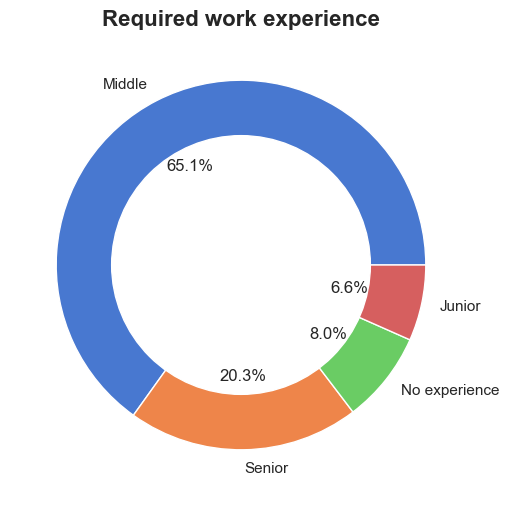

In [9]:
exp_count = df['experience'].value_counts()

plt.figure(figsize=(8, 6))
colors = sns.color_palette("muted")
plt.pie(exp_count, labels=exp_count.index, autopct='%1.1f%%', colors=colors)


centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.title(label = 'Required work experience', fontsize = 16, fontweight='bold')
plt.show();

### __What schedule are offered?__

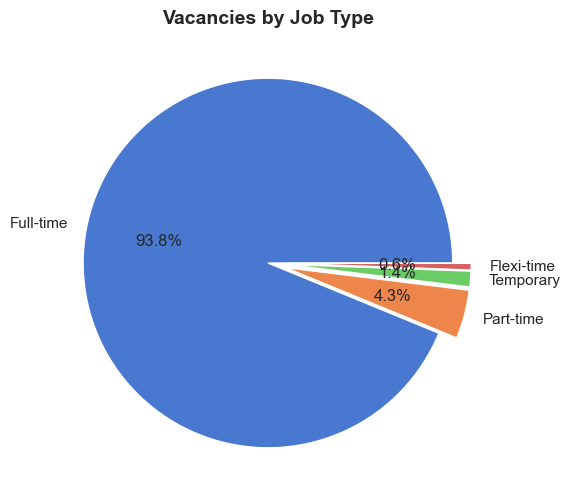

In [10]:
job_type_count = df['job_type'].value_counts()

plt.figure(figsize=(8, 6))
colors = sns.color_palette("muted")
explode = [0.1 if i > 0 else 0 for i in range(len(job_type_count))]  
plt.pie(job_type_count, labels=job_type_count.index, autopct='%1.1f%%', colors=colors, explode=explode,)
plt.title('Vacancies by Job Type', fontsize=14,fontweight='bold')
plt.show();

### __On-site or remote?__

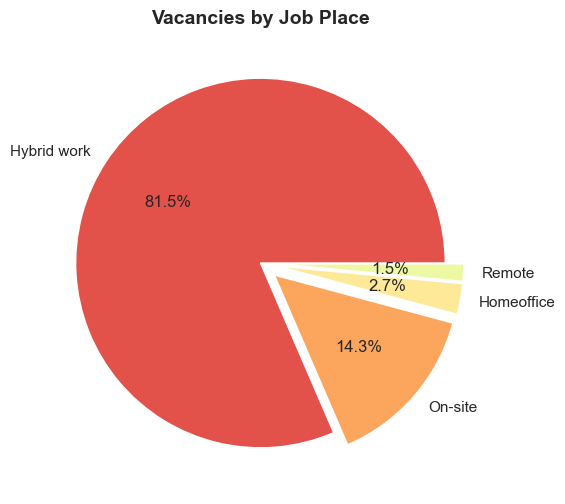

In [11]:
job_type_count = df['job_place'].value_counts()

plt.figure(figsize=(8, 6))
colors = sns.color_palette("Spectral")
explode = [0.1 if i > 0 else 0 for i in range(len(job_type_count))]  
plt.pie(job_type_count, labels=job_type_count.index, autopct='%1.1f%%', colors=colors, explode=explode,)
plt.title('Vacancies by Job Place', fontsize=14,fontweight='bold')
plt.show();

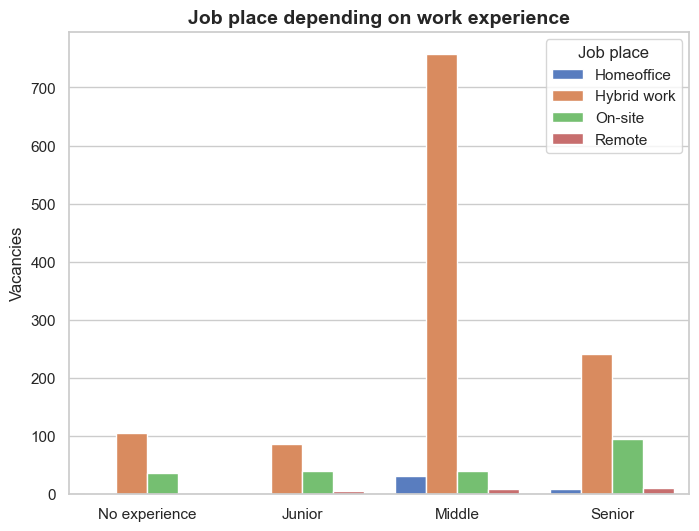

In [12]:
experience_order = ["No experience", "Junior", "Middle", "Senior"]
df["experience"] = pd.Categorical(df["experience"], categories=experience_order, ordered=True)

job_place_counts = df.groupby(["experience", "job_place"], observed=True).size().reset_index(name="count")


plt.figure(figsize=(8, 6))
sns.barplot(data=job_place_counts, x="experience", y="count", hue="job_place", palette="muted")


plt.title("Job place depending on work experience", fontsize=14,fontweight='bold')
plt.xlabel("")
plt.ylabel("Vacancies")
plt.xticks(rotation=0)
plt.legend(title="Job place")
plt.show();

### __Salary__

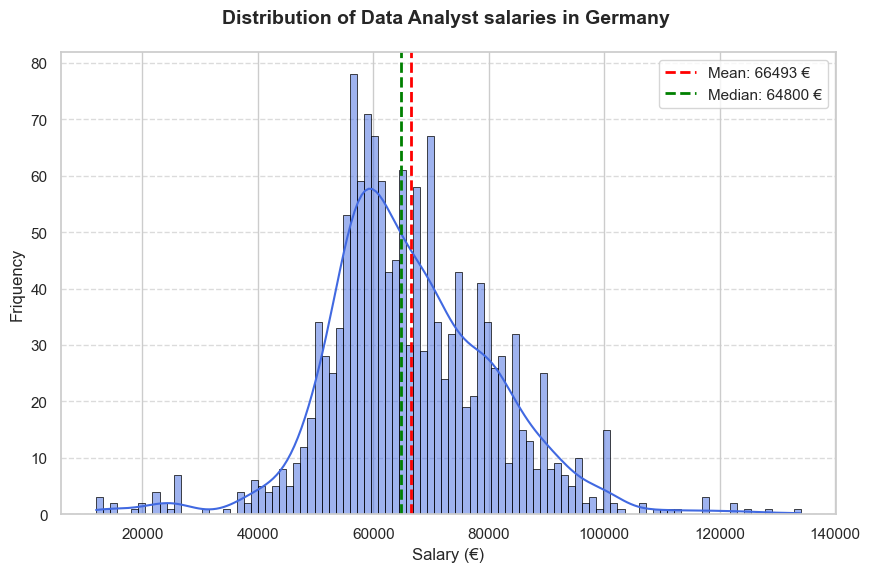

In [13]:
df_filtered = df.dropna(subset=["avg_salary"])

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered["avg_salary"], bins=100, kde=True, color="royalblue", edgecolor="black")

mean_salary = df_filtered["avg_salary"].mean()
median_salary = df_filtered["avg_salary"].median()
plt.axvline(mean_salary, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_salary:.0f} €')
plt.axvline(median_salary, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_salary:.0f} €')


plt.xlabel("Salary (€)")
plt.ylabel("Friquency")
plt.title("Distribution of Data Analyst salaries in Germany \n", fontsize=14,fontweight='bold')
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

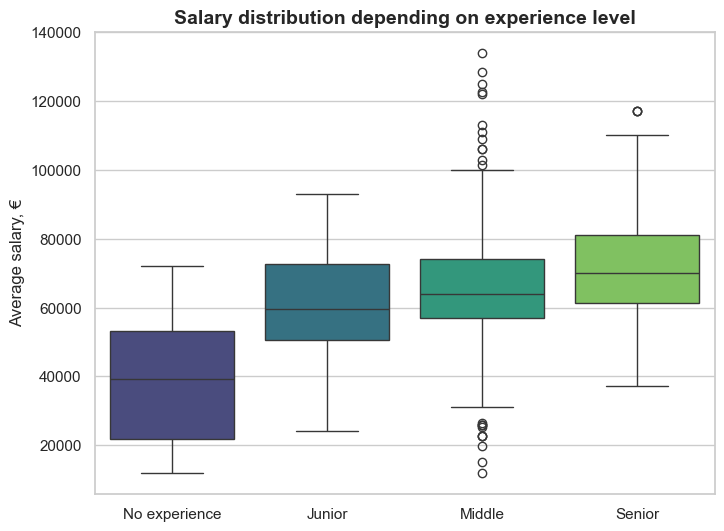

In [14]:
experience_order = ["No experience", "Junior", "Middle", "Senior"]
df["experience"] = pd.Categorical(df["experience"], categories=experience_order, ordered=True)


plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="experience", y="avg_salary", palette="viridis", hue = "experience")
plt.title("Salary distribution depending on experience level",fontsize=14,fontweight='bold' )
plt.xlabel("")
plt.ylabel("Average salary, €")
plt.show();

### __Where is hiring?__

#### Distribution of vacancies by Federal Lands

In [15]:
df['bundesland'].value_counts()

bundesland
Bayern                    781
Nordrhein-Westfalen       770
Baden-Württemberg         572
Berlin                    568
Hessen                    393
Hamburg                   362
Niedersachsen             203
Sachsen                    95
Rheinland-Pfalz            59
Schleswig-Holstein         53
Thüringen                  41
Bremen                     36
Brandenburg                31
Saarland                   28
Sachsen-Anhalt             18
Mecklenburg-Vorpommern     14
Name: count, dtype: int64

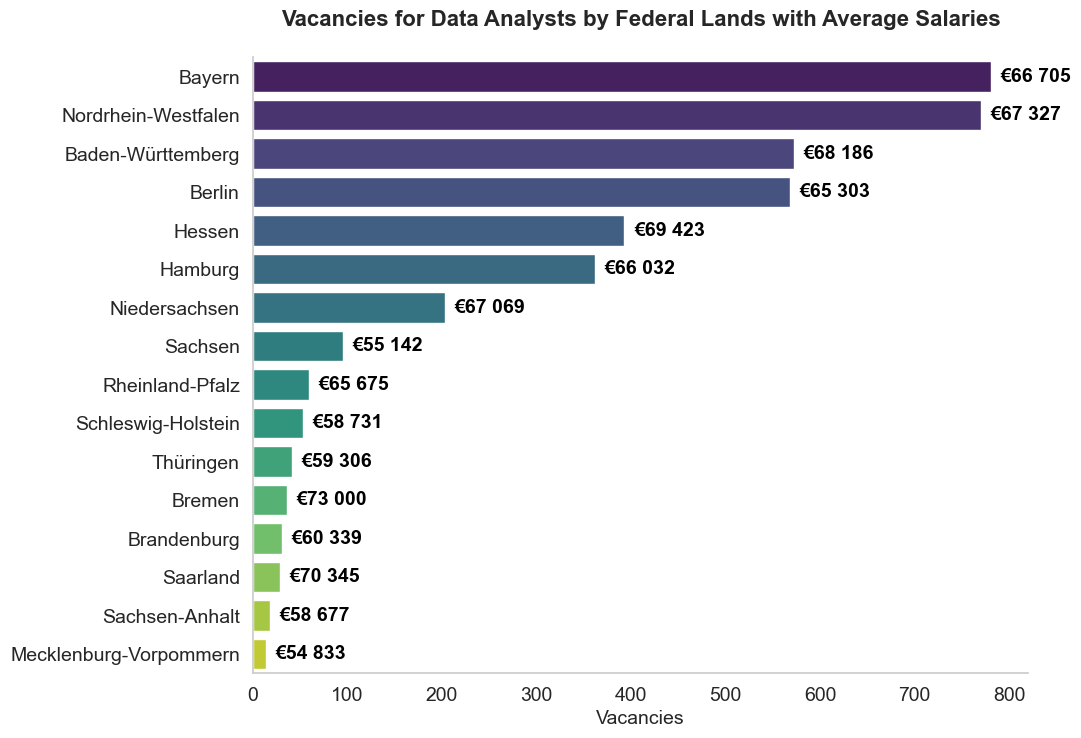

In [16]:
region_vac = df['bundesland'].value_counts().reset_index()
region_vac.columns = ['bundesland', 'count']

# Average salary for Data Analyst
average_salary_by_region = df.groupby('bundesland')['avg_salary'].mean().reset_index()
average_salary_by_region.columns = ['bundesland', 'avg_salary_data_analyst']

region_salary_df = region_vac.merge(average_salary_by_region, on='bundesland')

plt.figure(figsize=(10, 8))
barplot = sns.barplot(data=region_salary_df, y='bundesland', x='count', hue='bundesland', dodge=False, legend=False, palette='viridis')

for index, row in region_salary_df.iterrows():
    salary_formatted_data_analyst = f"€{row['avg_salary_data_analyst']:,.0f}".replace(',', ' ') 
    barplot.text(
        row['count'] + 10, 
        index, 
        salary_formatted_data_analyst,
        color='black',
        ha="left",
        va="center",
        fontsize=14,
        fontweight='bold'
    )

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(f'Vacancies for Data Analysts by Federal Lands with Average Salaries\n', fontsize=16, fontweight='bold')
plt.xlabel('Vacancies', fontsize=14)
plt.ylabel('', fontsize=14)
sns.despine(top=True, right=True)
plt.grid(False)
plt.show()

#### Percentage of vacancies relative to population by Federal Lands

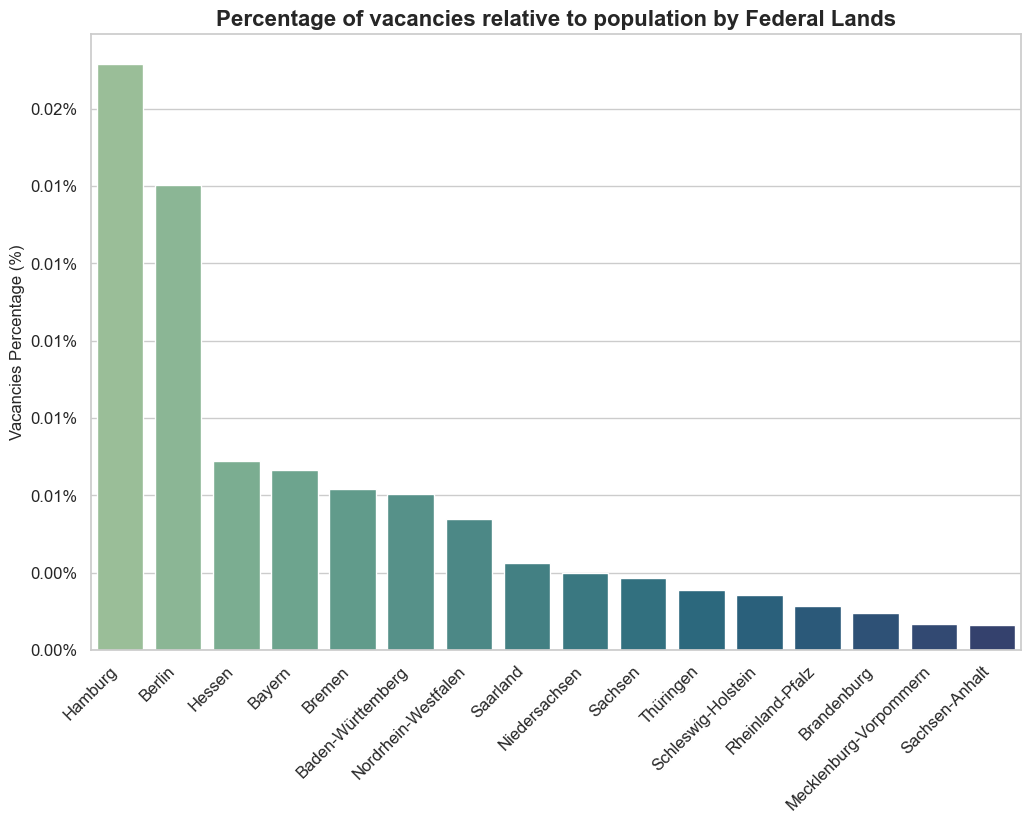

In [17]:
population_data = {
    'bundesland': ['Berlin', 'Bayern', 'Sachsen', 'Hessen', 'Hamburg','Baden-Württemberg','Brandenburg','Bremen', 'Mecklenburg-Vorpommern', 'Niedersachsen', 'Nordrhein-Westfalen', 'Rheinland-Pfalz', 'Saarland', 'Sachsen-Anhalt', 'Schleswig-Holstein', 'Thüringen'],
    'population': [3782202, 13435062, 4089467, 6420729, 1910160, 11339260, 2581667, 691703, 1629464, 8161981, 18190422, 4174311, 994424, 2180448, 2965691, 2122335] 
}

population_df = pd.DataFrame(population_data)

region_vac = df['bundesland'].value_counts().reset_index()
region_vac.columns = ['bundesland', 'vacancies']

merged_df = region_vac.merge(population_df, on='bundesland')
merged_df['vacancies_percentage'] = (merged_df['vacancies'] / merged_df['population']) * 100
merged_df = merged_df.sort_values(by='vacancies_percentage', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=merged_df, x='bundesland', y='vacancies_percentage', hue='bundesland', palette='crest')

plt.title('Percentage of vacancies relative to population by Federal Lands', fontsize=16, fontweight='bold')
plt.xlabel('', fontsize=14)
plt.ylabel('Vacancies Percentage (%)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
plt.show();

#### Distribution of salary levels in Federal Lands

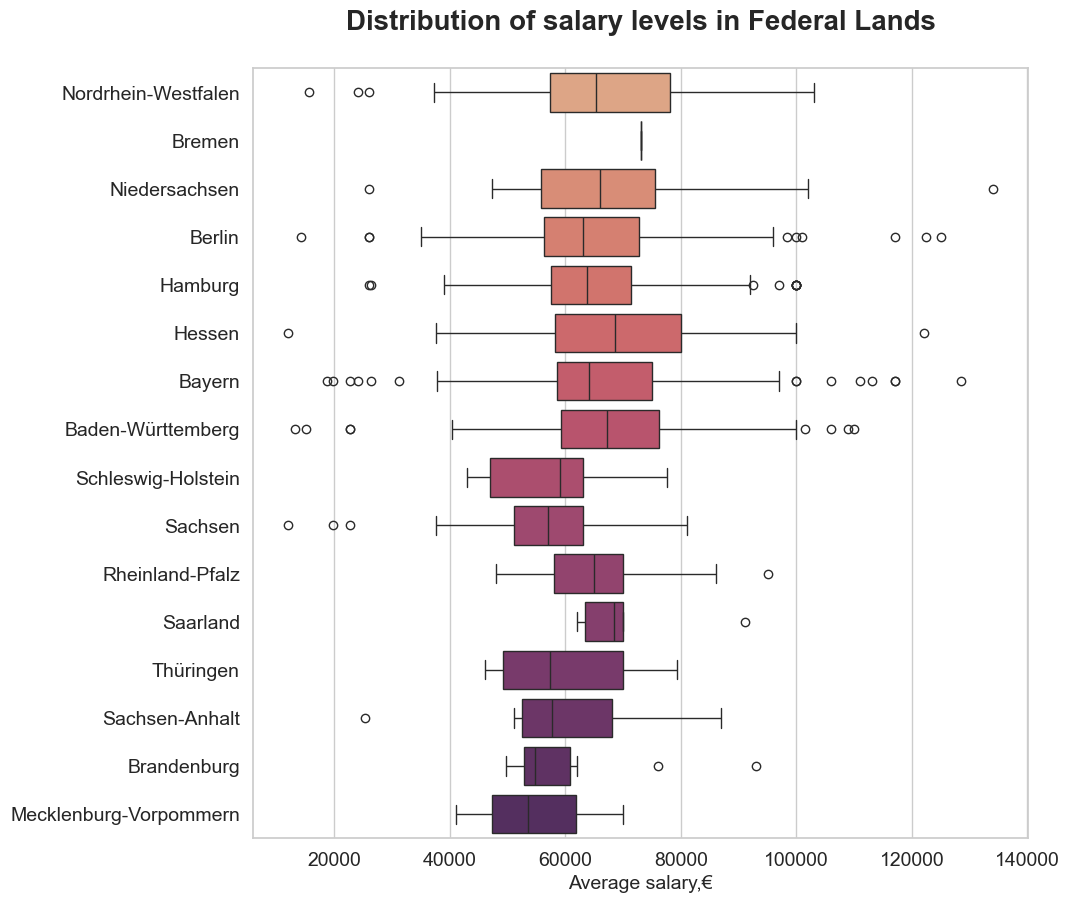

In [18]:
f, ax = plt.subplots(figsize=(10, 10))
fig = sns.boxplot(x='avg_salary', y='bundesland', data=df, palette='flare', hue = 'bundesland')

plt.title(f'Distribution of salary levels in Federal Lands\n', fontsize=20, fontweight='bold')
plt.ylabel('', fontsize=14)
plt.xlabel('Average salary,€', fontsize=14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14);


#### Comparison of the average salary of a data analyst with the average salary by Federal Lands

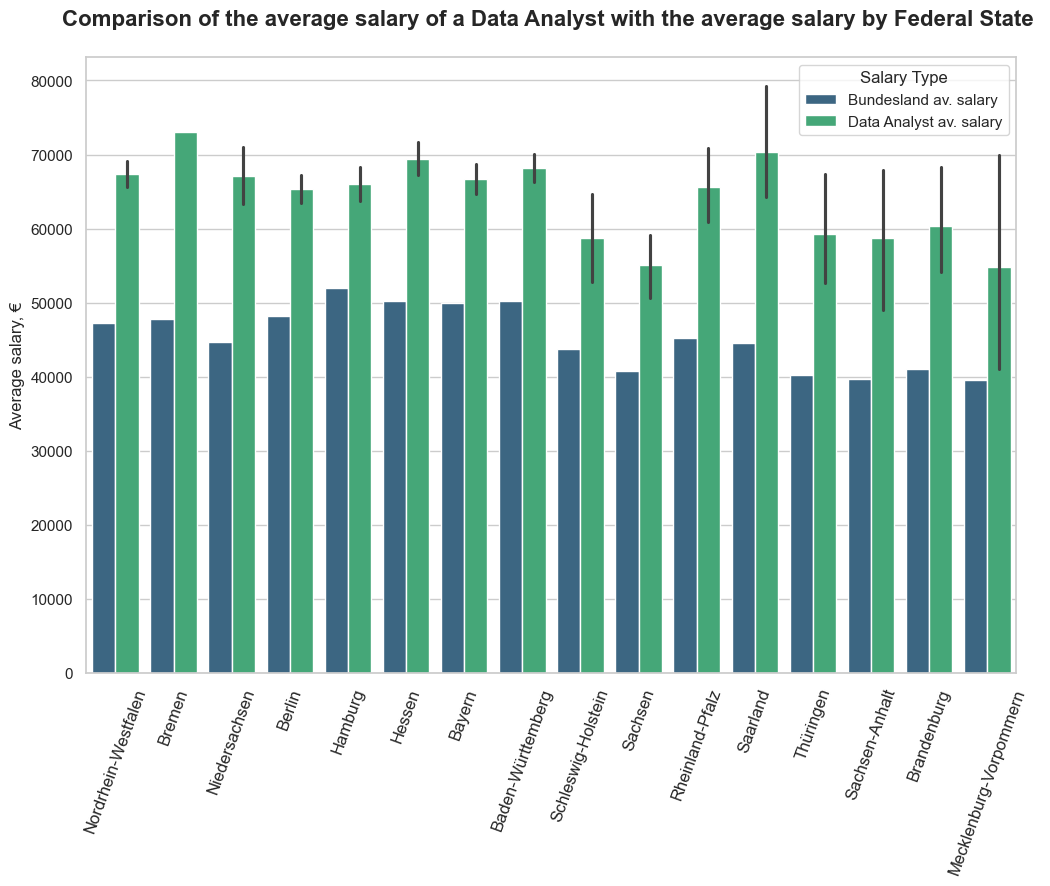

In [19]:
bundesland_salary_data = pd.DataFrame({
    'bundesland': ['Berlin', 'Bayern', 'Sachsen', 'Hessen', 'Hamburg','Baden-Württemberg','Brandenburg','Bremen', 'Mecklenburg-Vorpommern', 'Niedersachsen', 'Nordrhein-Westfalen', 'Rheinland-Pfalz', 'Saarland', 'Sachsen-Anhalt', 'Schleswig-Holstein', 'Thüringen'],
    'avg_salary_bundesland': [48250, 50000, 40750, 50250, 52000, 50250, 41000, 47750, 39500, 44750, 47250, 45250, 44500, 39750, 43750 ,40250] 
})


df_merged = pd.merge(df, bundesland_salary_data, on="bundesland")
df_melted = pd.melt(df_merged, id_vars=["bundesland"], value_vars=["avg_salary_bundesland", "avg_salary"], 
                   var_name="salary_type", value_name="salary")


plt.figure(figsize=(12, 8))
sns.barplot(data=df_melted, x="bundesland", y="salary", hue="salary_type", palette="viridis")

plt.title("Comparison of the average salary of a Data Analyst with the average salary by Federal State \n", fontsize=16, fontweight='bold')
plt.xlabel("")
plt.ylabel("Average salary, €", fontsize=12)
plt.xticks(rotation=70, fontsize=12)

handles, labels = plt.gca().get_legend_handles_labels()
labels = ["Bundesland av. salary", "Data Analyst av. salary"]
plt.legend(handles=handles, labels=labels, title="Salary Type", loc="upper right")

plt.show();

#### Companies vs. Vacancies by Federal Lands

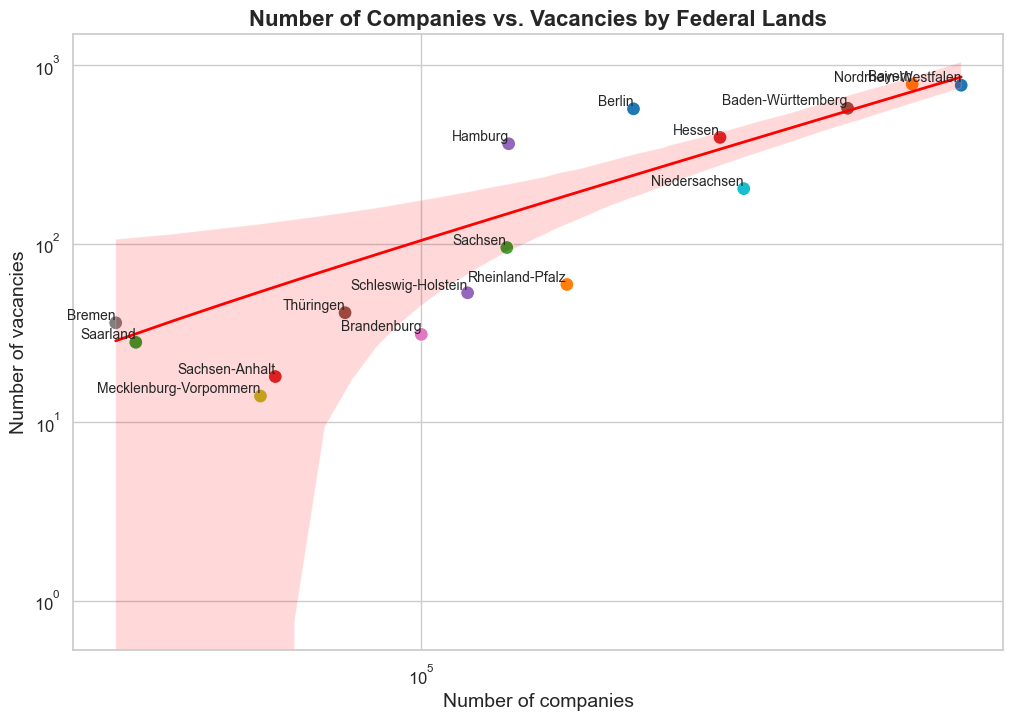

In [20]:
bundesland_companies = pd.DataFrame({
    'bundesland': ['Berlin', 'Bayern', 'Sachsen', 'Hessen', 'Hamburg','Baden-Württemberg','Brandenburg','Bremen', 'Mecklenburg-Vorpommern', 'Niedersachsen', 'Nordrhein-Westfalen', 'Rheinland-Pfalz', 'Saarland', 'Sachsen-Anhalt', 'Schleswig-Holstein', 'Thüringen'],
    'companies_number': [224968, 651724, 138728, 312989, 139706, 509393, 100087, 31183, 54176, 342682, 785759, 174453, 33666, 57327, 119451, 74821] 
})


vacancy_count = df['bundesland'].value_counts().reset_index()
vacancy_count.columns = ['bundesland', 'vacancies']
companies_vacancies_df = pd.merge(bundesland_companies, vacancy_count, on='bundesland')

plt.figure(figsize=(12, 8))
sns.scatterplot(data=companies_vacancies_df, x='companies_number', y='vacancies', hue='bundesland', palette='tab10', s=100)
sns.regplot(data=companies_vacancies_df, x='companies_number', y='vacancies', scatter=False, color='black', line_kws={'linewidth': 2, 'color': 'red'})

plt.title('Number of Companies vs. Vacancies by Federal Lands', fontsize=16, fontweight='bold')
plt.xlabel('Number of companies', fontsize=14)
plt.ylabel('Number of vacancies', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Добавляем подписи к точкам
for i in range(companies_vacancies_df.shape[0]):
    plt.text(companies_vacancies_df['companies_number'].iloc[i],
             companies_vacancies_df['vacancies'].iloc[i],
             companies_vacancies_df['bundesland'].iloc[i],
             fontsize=10, ha='right', va='bottom', rotation=0)


plt.xscale('log')
plt.yscale('log')
plt.legend([], [], frameon=False)
plt.show()

#### Top 10 cities with the largest number of vacancies.

In [21]:
top_10_cities = df['location'].value_counts().head(10).sort_values(ascending=False)
top_10_cities

location
Berlin        563
München       392
Hamburg       359
Frankfurt     232
Düsseldorf    186
Köln          151
Stuttgart      96
Hannover       82
Main           74
Essen          46
Name: count, dtype: int64

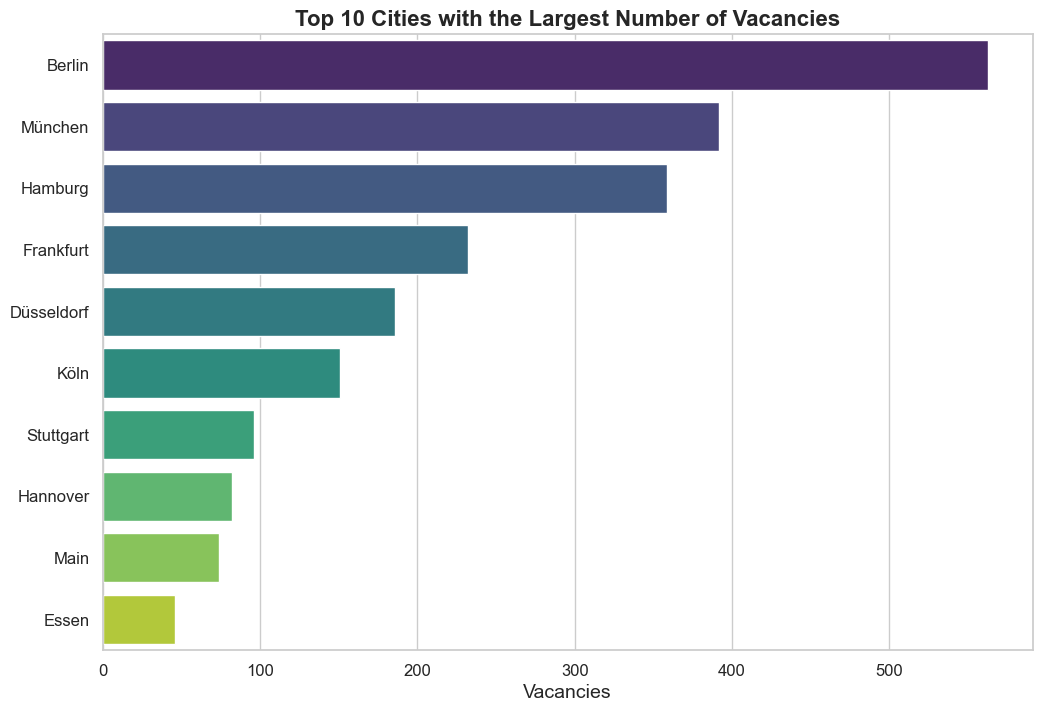

In [22]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette='viridis', orient='h')

plt.title('Top 10 Cities with the Largest Number of Vacancies', fontsize=16, fontweight='bold')
plt.xlabel('Vacancies', fontsize=14)
plt.ylabel('', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show();

### __Who's hiring?__

#### Top 15 companies by the number of vacancies

In [23]:
df['company'].value_counts().head(15)

company
adesso SE                                91
PwC Deutschland                          56
All for One Group SE                     55
Deloitte                                 47
Agoda                                    40
econex verkehrsconsult GmbH              35
CHECK24                                  32
NTT DATA Business Solutions              31
ZEISS                                    29
trivago                                  21
meinestadt.de                            19
BMW Group                                19
ING Deutschland                          16
SPIE Germany Switzerland Austria GmbH    16
Microsoft                                15
Name: count, dtype: int64

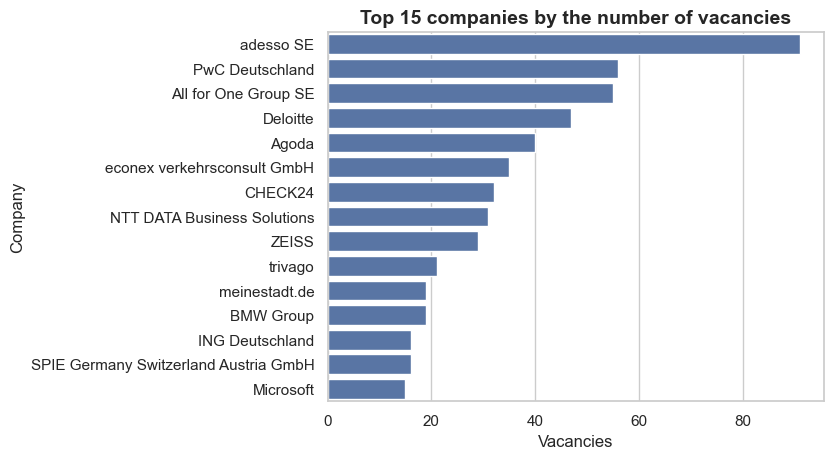

In [24]:

sns.countplot(y=df['company'], order=df['company'].value_counts().head(15).index)
plt.title("Top 15 companies by the number of vacancies",fontweight='bold',fontsize=14)
plt.xlabel('Vacancies', fontsize=12)
plt.ylabel('Company', fontsize=12)

plt.show()

In [25]:
df['industry'].value_counts()

industry
E-commercetrade and Retail                            577
Internet and IT                                       367
Industry and mechanical engineering                   286
Banking and financial services                        275
Management Consulting                                 262
Service company                                       207
Media and publishing                                  146
Building                                              129
Marketing advertising PR and design                   128
Insurance                                             117
Education and science                                  97
Computer Software                                      95
Transport and logistics                                90
Hotels tourism travel agencies                         88
Sport health and social                                78
Real estate                                            69
Wholesale                                              58
HR se

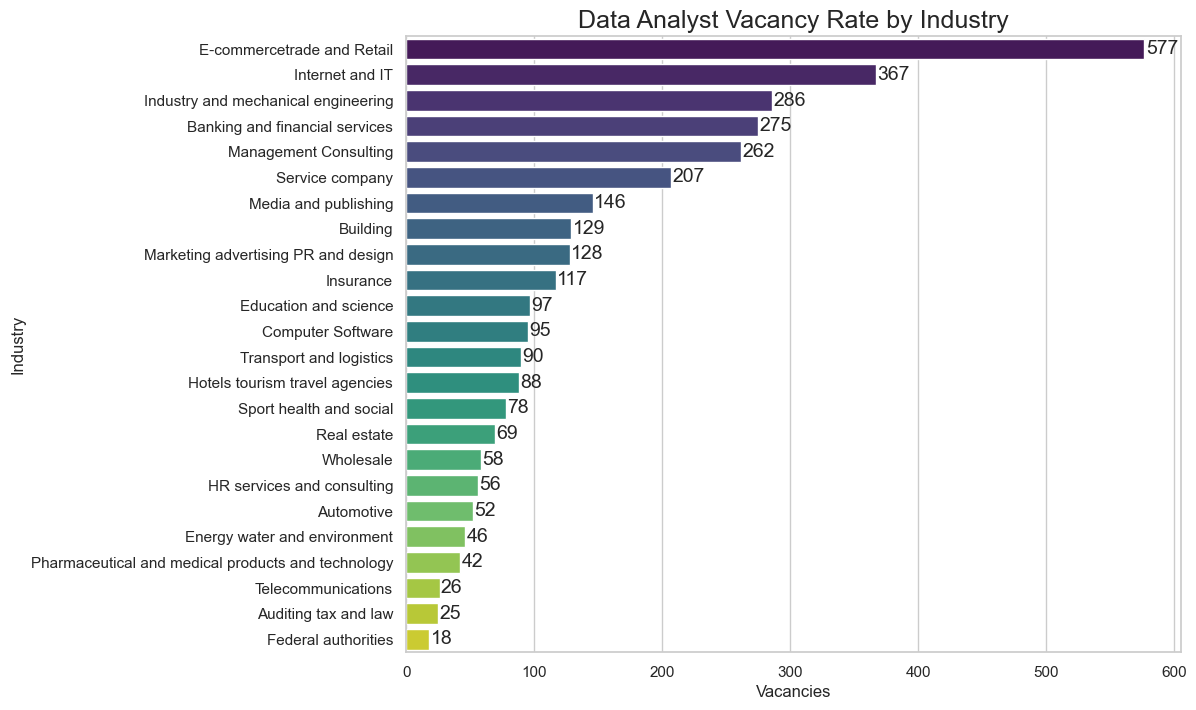

In [26]:
industry_counts = df["industry"].value_counts().reset_index()
industry_counts.columns = ["industry", "vacancy_count"]

top_n = 30
industry_counts = industry_counts.head(top_n)

plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
ax = sns.barplot(data=industry_counts, x="vacancy_count", y="industry", palette="viridis", hue = 'industry')

plt.xlabel("Vacancies")
plt.ylabel("Industry")
plt.title("Data Analyst Vacancy Rate by Industry",fontsize=18)

for index, value in enumerate(industry_counts["vacancy_count"]):
    ax.text(value + 1, index, str(value), va="center", fontsize=14)

plt.show();

#### Salaries by Industry

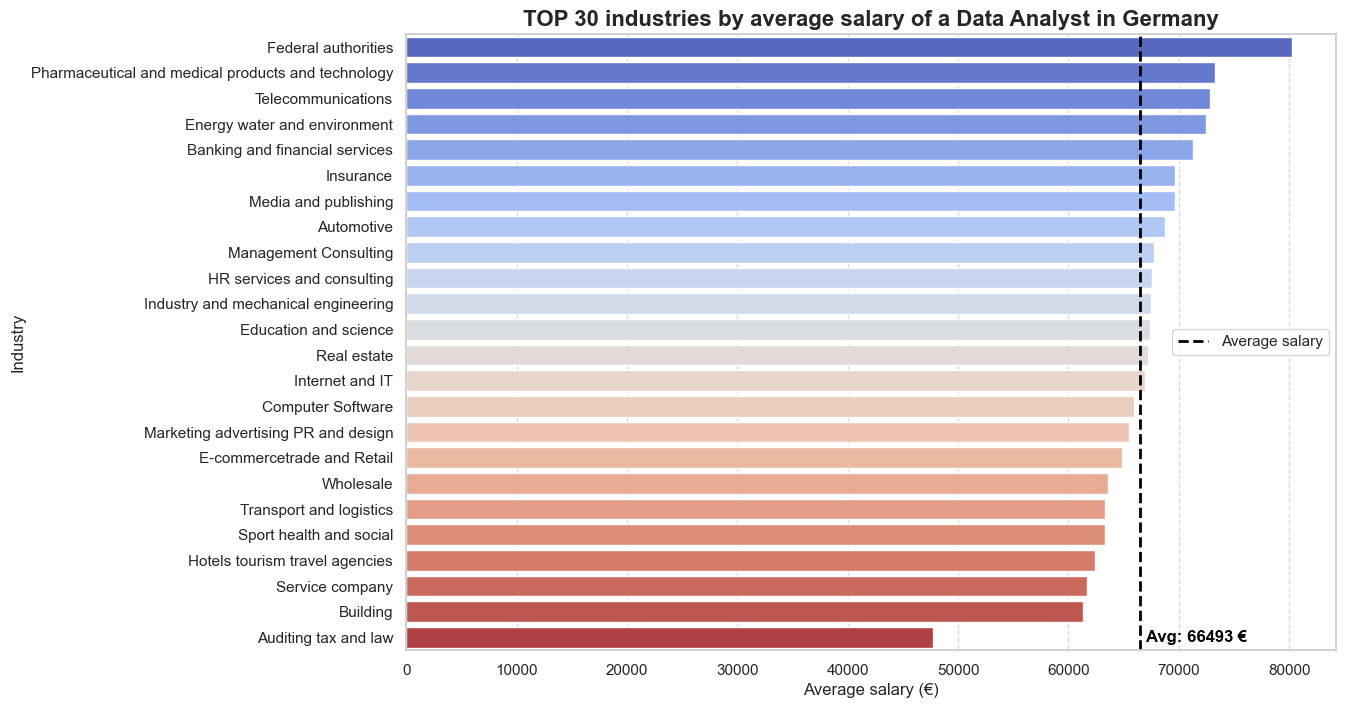

In [27]:

df_industry_salary = df.groupby("industry", as_index=False)["avg_salary"].mean()
df_industry_salary = df_industry_salary.dropna()
df_industry_salary = df_industry_salary.sort_values(by="avg_salary", ascending=False).head(30)

overall_avg_salary = df["avg_salary"].mean()


plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
ax = sns.barplot(
    data=df_industry_salary, 
    x="avg_salary", 
    y="industry", 
    hue="industry",  
    dodge=False,     
    palette="coolwarm", 
    legend=False  
)

ax.axvline(overall_avg_salary, color="black", linestyle="dashed", linewidth=2, label="Average salary")
plt.text(overall_avg_salary + 500, len(df_industry_salary) - 1, f"Avg: {overall_avg_salary:.0f} €", 
         verticalalignment="center", fontsize=12, color="black", fontweight="bold")

plt.xlabel("Average salary (€)")
plt.ylabel("Industry")
plt.title("TOP 30 industries by average salary of a Data Analyst in Germany",fontsize=16, fontweight='bold')
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Добавляем легенду
plt.legend()

plt.show()


### __What skills are most in demand?__

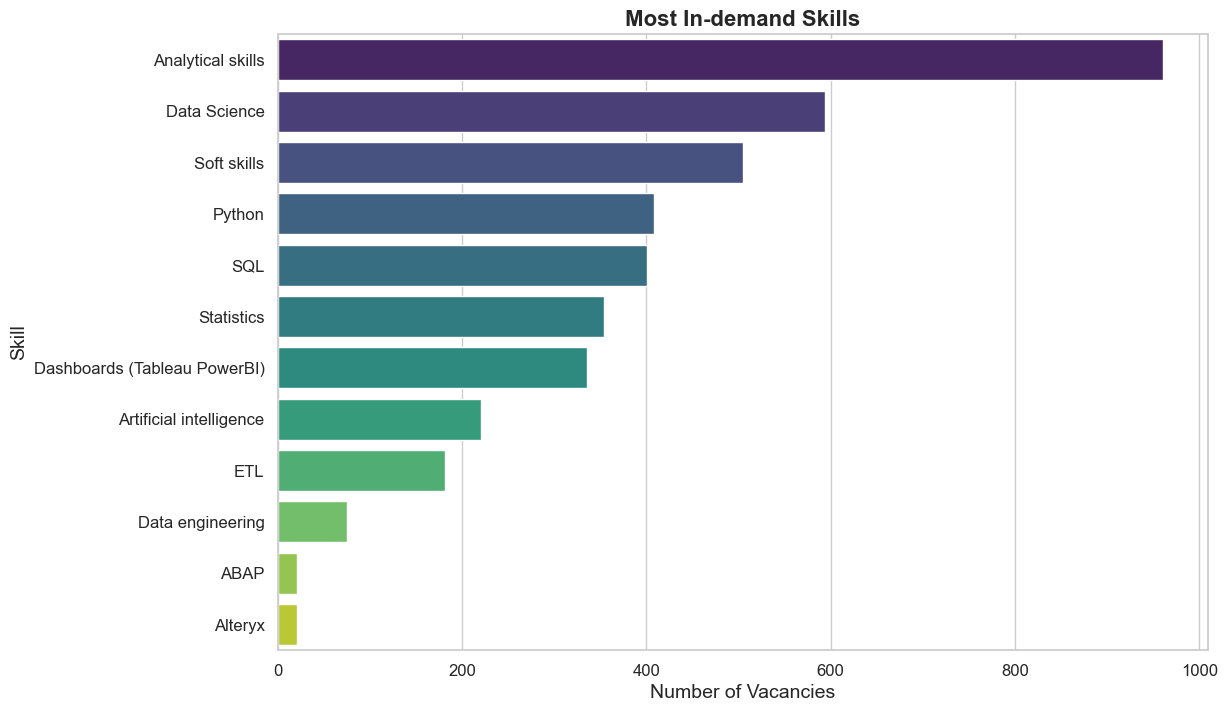

In [28]:
skills_columns = ['ETL', 'Data Science', 'Data engineering', 'Analytical skills', 'Statistics', 'Artificial intelligence', 
                  'Soft skills', 'Python', 'SQL', 'ABAP', 'Alteryx', 'Dashboards (Tableau PowerBI)']

skill_counts = df[skills_columns].sum()
skill_counts = skill_counts.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=skill_counts.values, y=skill_counts.index, palette='viridis')

plt.title('Most In-demand Skills', fontsize=16, fontweight='bold')
plt.xlabel('Number of Vacancies', fontsize=14)
plt.ylabel('Skill', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

#### How do the skill requirements differ depending on the experience level?

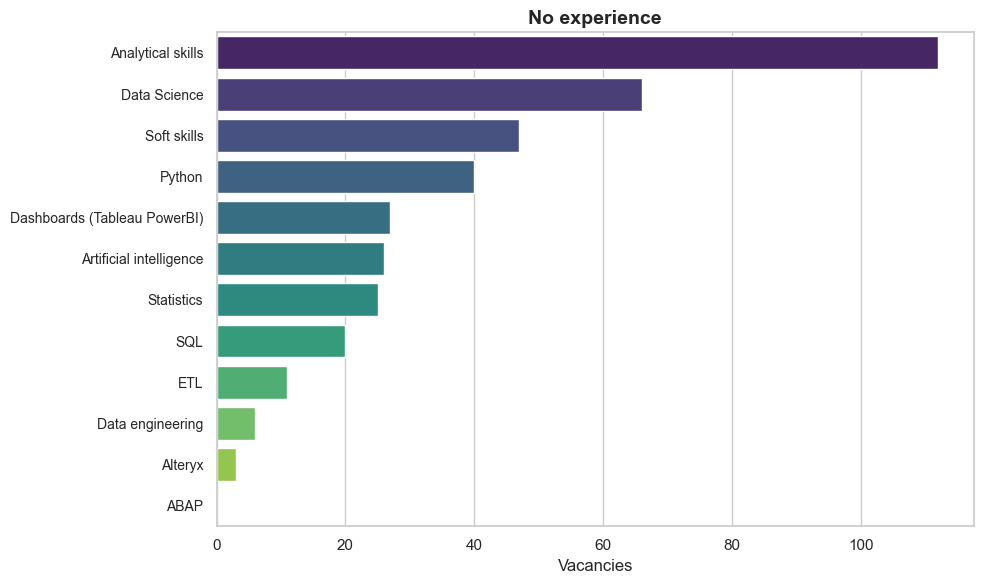

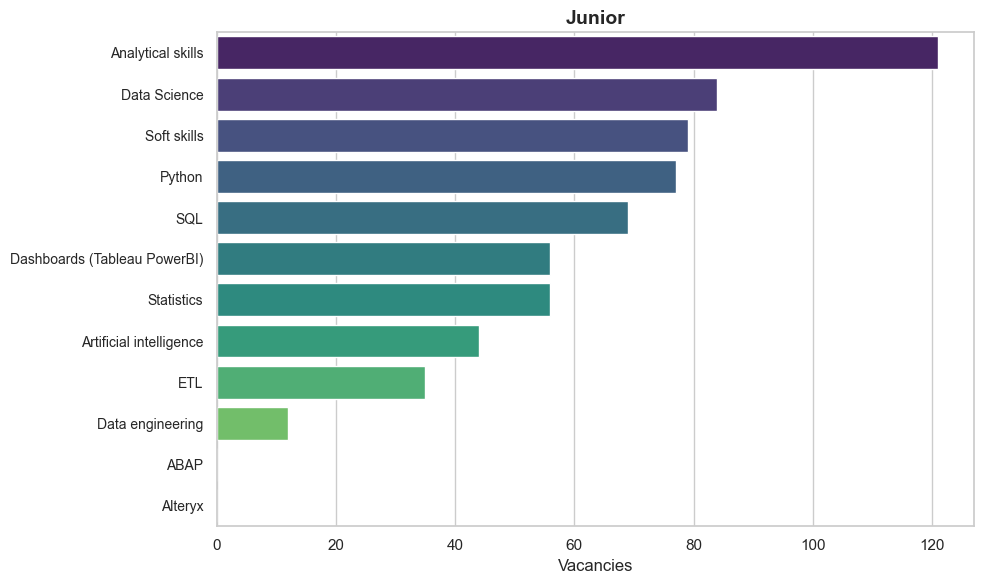

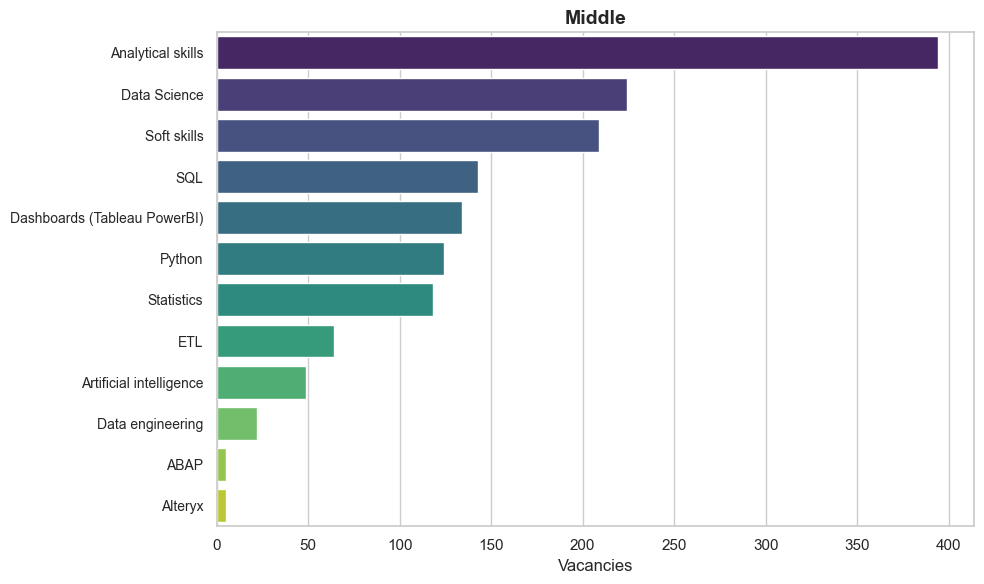

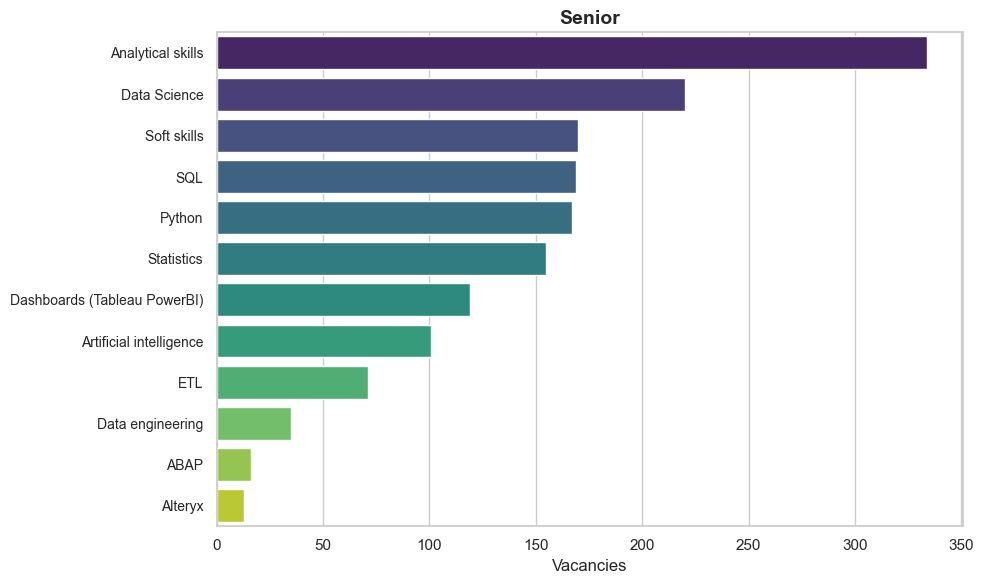

In [29]:

df_skills = df.copy()
skills_columns = ['ETL', 'Data Science', 'Data engineering', 'Analytical skills', 'Statistics', 'Artificial intelligence', 
                  'Soft skills', 'Python', 'SQL', 'ABAP', 'Alteryx', 'Dashboards (Tableau PowerBI)']
df_skills_melted = df_skills.melt(id_vars=['experience'], value_vars=skills_columns, var_name='skill', value_name='value')

df_skills_melted = df_skills_melted[df_skills_melted['value'] == 1]
skill_counts = df_skills_melted.groupby(['experience', 'skill']).size().reset_index(name='count')
skill_counts = skill_counts.sort_values(by=['experience', 'count'], ascending=[True, False])


experiences = ['No experience', 'Junior', 'Middle', 'Senior']
for experience in experiences:
    experience_data = skill_counts[skill_counts['experience'] == experience]
    plt.figure(figsize=(10, 6))
    sns.barplot(x='count', y='skill', data=experience_data, palette='viridis', orient='h')
    plt.title(f"{experience}", fontsize=14, fontweight='bold')
    plt.xlabel('Vacancies', fontsize=12)
    plt.ylabel('', fontsize=12)
    plt.tick_params(axis='y', labelsize=10)
    plt.tight_layout()
    plt.show();

### __Forecast future workforce demands__

#### Forecasting using Linear Regression

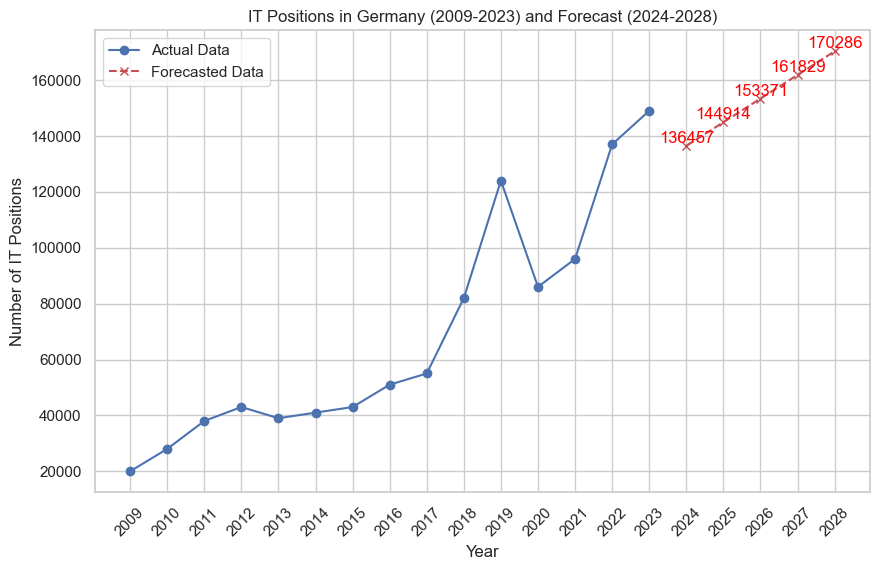

In [30]:

data = {
    'Year': [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'IT_Positions': [20000, 28000, 38000, 43000, 39000, 41000, 43000, 51000, 55000, 82000, 124000, 86000, 96000, 137000, 149000]
}

it_jobs = pd.DataFrame(data)

# Linear regression model
X = np.array(it_jobs['Year']).reshape(-1, 1) 
y = np.array(it_jobs['IT_Positions']) 

model = LinearRegression()
model.fit(X, y)

# Predict for the next 5 years
future_years = np.array([2024, 2025, 2026, 2027, 2028]).reshape(-1, 1)
predictions = model.predict(future_years)

plt.figure(figsize=(10, 6))

# Plot original data
plt.plot(it_jobs['Year'], it_jobs['IT_Positions'], marker='o', color='b', label='Actual Data')

# Plot the predictions (forecasted data)
plt.plot(future_years, predictions, marker='x', linestyle='--', color='r', label='Forecasted Data')

# Display forecasted values on the plot
for year, prediction in zip(future_years.flatten(), predictions):
    plt.text(year, prediction, f'{prediction:.0f}', color='red', ha='center', va='bottom')

# Set x-axis to integer years
plt.xticks(np.arange(2009, 2029, 1), rotation=45)  # 2009-2028 years, with rotation for readability


plt.title('IT Positions in Germany (2009-2023) and Forecast (2024-2028)')
plt.xlabel('Year')
plt.ylabel('Number of IT Positions')
plt.grid(True)
plt.legend()
plt.show();